<a href="https://colab.research.google.com/github/alecbidaran/Python_excersies-/blob/main/sparkhomeworkpart2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init("spark-2.4.4-bin-hadoop2.7")# SPARK_HOME
import time

In [ ]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession,SQLContext,Row
spark = SparkSession.builder.master("local[4]").getOrCreate()
import numpy as np 


In [ ]:
sc=SparkContext.getOrCreate()

In [ ]:
s0=time.clock()
text_file1=sc.textFile('/content/drive/My Drive/Colab Notebooks/C1.txt').cache()
sql_context=SQLContext(sc)
text1=text_file1.map(lambda line :[x for x in line.split(",")])
text_toint1=text_file1.map(lambda x:int(x[4:10]))
text_toint2=text_file1.map(lambda x:int(x[14:20]))
x=text_toint1.collect()
y=text_toint2.collect()
train=[]
for i in range(5000):
    training=[x[i],y[i]]
    train.append(training)
train=np.array(train)
s1=time.clock()
d0=s1-s0

In [ ]:


text1.take(100)

[['    624474    837604'],
 ['    673412    735362'],
 ['    647442    677000'],
 ['    532283    741384'],
 ['    646529    742844'],
 ['    647535    755101'],
 ['    644131    777721'],
 ['    521368    736923'],
 ['    688940    798967'],
 ['    592666    805244'],
 ['    645068    716248'],
 ['    666740    707391'],
 ['    662064    644958'],
 ['    630628    689662'],
 ['    623268    774834'],
 ['    617896    766560'],
 ['    560260    629298'],
 ['    595728    703618'],
 ['    594177    665266'],
 ['    544862    802997'],
 ['    512102    686369'],
 ['    742244    626859'],
 ['    709853    684304'],
 ['    662854    764737'],
 ['    612693    778368'],
 ['    656011    735274'],
 ['    644769    750956'],
 ['    688852    804551'],
 ['    714271    804144'],
 ['    695472    794296'],
 ['    746441    829147'],
 ['    632975    756806'],
 ['    679779    842107'],
 ['    609763    693428'],
 ['    665375    784377'],
 ['    783661    772895'],
 ['    651521    719802'],
 

In [ ]:
train

array([[624474, 837604],
       [673412, 735362],
       [647442, 677000],
       ...,
       [569266, 738385],
       [444587, 878830],
       [434041, 814466]])

In [ ]:
from pyspark.mllib.clustering import KMeans,KMeansModel

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
start=time.clock()
costs=[]

for i in range(1,26):
    model=KMeans.train(sc.parallelize(train),k=i)
    Costs=model.computeCost(sc.parallelize(train))
    costs.append(Costs)
end=time.clock()    
print(costs)
print("duration for 4 cpu",end-start+d0)

[289388531719761.0, 175012382278706.47, 110422302667512.45, 82545080300205.16, 62736141503695.56, 52124496177805.2, 42728587804595.445, 39438597575475.51, 32227452432562.12, 28904042437958.094, 25494152573529.484, 23621242785810.516, 19349835117690.18, 20277806773322.586, 19304618095946.14, 14877368511102.29, 14206053356718.246, 13751299663560.379, 13310871101899.742, 12744954718794.49, 12330498779487.102, 11943769034622.668, 11169924988970.215, 11104500668402.238, 10562586863791.076]
duration for 4 cpu 2.192239


Text(0, 0.5, 'cost')

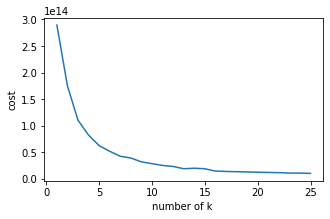

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(range(1,26),costs)
plt.xlabel("number of k ")
plt.ylabel("cost")

In [ ]:
import pandas as pd 

In [ ]:
pd.DataFrame(costs,columns=['costs'])

,costs
0,2.893885e+14
1,1.750124e+14
2,1.104223e+14
3,8.254508e+13
4,6.273614e+13
5,5.212450e+13
6,4.272859e+13
7,3.943860e+13
8,3.222745e+13
9,2.890404e+13


In [ ]:
centers=model.clusterCenters

In [ ]:

cx=[x[0] for x in centers]
cy=[y[1] for y in centers]

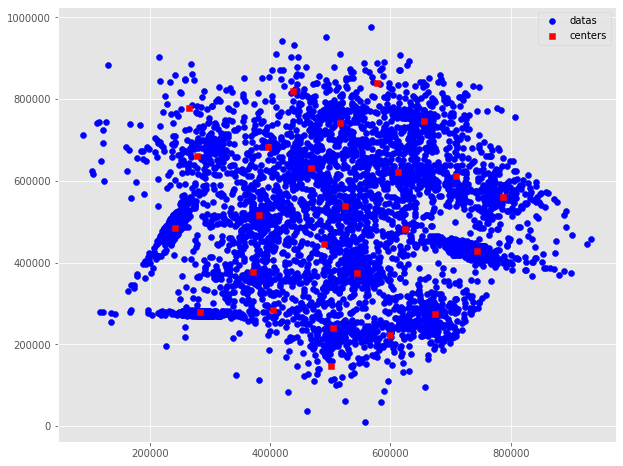

In [ ]:

plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.scatter(train[:,0],train[:,1],color='b',label='datas')
plt.scatter(cx,cy,color='r',marker='s',label='centers')
plt.legend()



```
`# This is formatted as code`
```


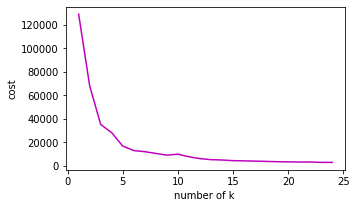

توزیع داده و مراکز خوشه ی فایل دوم 

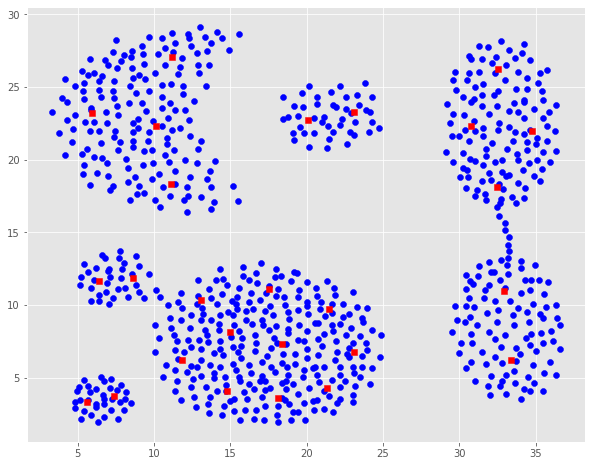


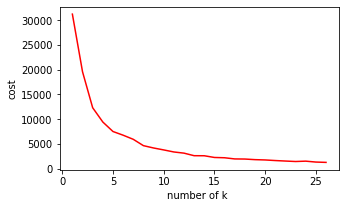


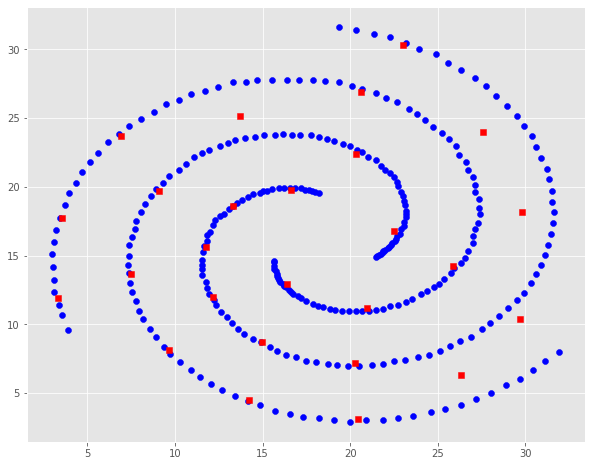

Text(0, 0.5, 'times')

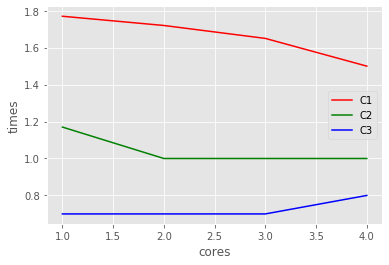

In [ ]:
coresC1=[1,2,3,4]
timesC1=[1.77,1.72,1.65,1.5]
coresC2=[1,2,3,4]
timesC2=[1.17,1,1,1]
coresC3=[1,2,3,4]
timesC3=[0.7,0.7,0.7,0.8]
plt.plot(coresC1,timesC1,c='r',label="C1")
plt.plot(coresC2,timesC2,c='g',label="C2")
plt.plot(coresC3,timesC3,c='b',label="C3")
plt.legend()

plt.xlabel("cores")
plt.ylabel("times")